## The Perceptron Algorithm

In [1]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

### 1. Define the hypothesis function 

In [2]:
def hypothesis(X, w):
    # X and w are vector inputs
    return np.sign(np.dot(X, w))

In [3]:
def predict(hypothesis, X, y, w):
    predictions = np.apply_along_axis(hypothesis, 1, X, w)
    # return the missclassified examples
    return X[y!=predictions]

def predictions(hypothesis, X, w):
    return np.apply_along_axis(hypothesis, 1, X, w)

In [4]:
def pick_example_from(missclassified, X, y):
    # shuffle the data
    np.random.shuffle(missclassified)
    # pick one example
    x = missclassified[0]
    index = np.where(np.all(X==x, axis=1))
    # return example and its correct predictions
    return x, y[index]


In [5]:
def algorithm(X, y):
    # initialize the weights .../... this includes the bias term
    w = np.random.rand(3)
    missclassified = predict(hypothesis, X, y, w)
    num_misclassified = []
    
    while missclassified.any():
        x, exp_y = pick_example_from(missclassified, X, y)
        w = w + x*exp_y
        missclassified = predict(hypothesis, X, y, w)
        num_misclassified.append(len(missclassified))
        
    return(w, num_misclassified)
    
    

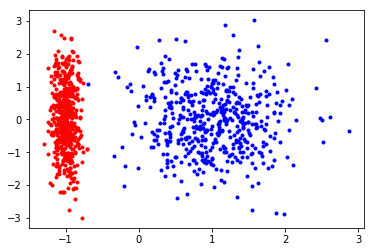

In [6]:
np.random.seed(17)
sample_size = 1000
separable = False
while not separable:
    samples = make_classification(n_samples=sample_size, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
    red = samples[0][samples[1] == 0]
    blue = samples[0][samples[1] == 1]
    separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.savefig('figures/linearlyseperable.png')
plt.show()

In [7]:
df = pd.DataFrame()

In [8]:
df["x0"] = np.ones(sample_size)
df["x1"] = samples[0][:, 0]
df["x2"] = samples[0][:, 1]
df["y0"]  = samples[1]
def toSign(row):
    if row["y0"] == 0:
        return -1
    else:
        return 1

df["y"] = df.apply(lambda row: toSign(row), axis=1)

In [9]:
df.head()

,x0,x1,x2,y0,y
0,1.0,-0.926888,-1.233916,0,-1
1,1.0,-1.008804,0.100516,0,-1
2,1.0,1.222534,1.584589,1,1
3,1.0,-1.036853,-0.111456,0,-1
4,1.0,-0.953622,-0.212574,0,-1


In [10]:
X = df.loc[:, "x0":"x2"]
y = df.loc[:, "y"]
w = np.random.rand(3)

X = X.values.reshape(sample_size, 3)
y = y.values.reshape(sample_size, )

#pick_example_from(missclassified, X, y)

In [11]:
w=algorithm(X, y)[0]
w

array([ 7.50714886, 11.01380808,  0.24311373])

In [12]:
countW = algorithm(X, y)[1]

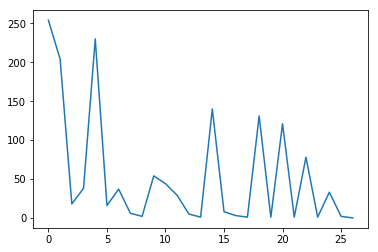

In [13]:
plt.plot([i for i in range(len(countW))], countW)

In [14]:
optimal_points = np.dot(X, algorithm(X, y)[0])
optimal_points.shape

(1000,)

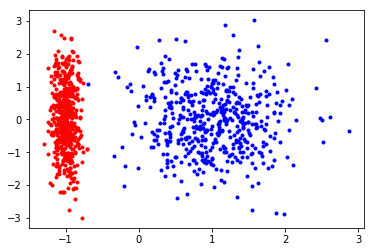

In [15]:
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.show()

In [16]:
def plorDB(w, X):
    
    w0, w1, w2 = w

    line_x_coords = X[:, 1]
    line_y_coords = -(w1/w2) * line_x_coords - (w0/w2)

    plt.plot(line_x_coords, line_y_coords)
    #plt.scatter(*input[:, 1:].T, c=target, s=75)
    plt.plot(red[:, 0], red[:, 1], 'r.')
    plt.plot(blue[:, 0], blue[:, 1], 'b.')
    plt.savefig("figures/separated.png")
    plt.show()


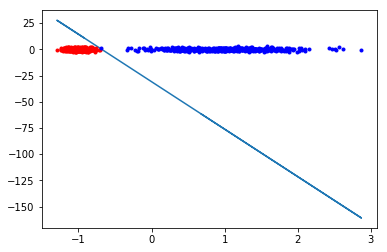

In [17]:
plorDB(w, X)

In [18]:
w=algorithm(X, y)[0]
w

array([5.94321846, 9.27652591, 0.54118665])

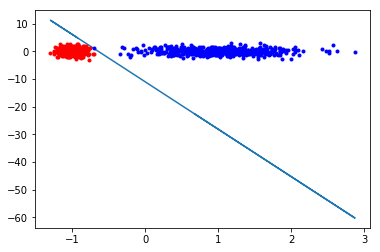

In [19]:
plorDB(w, X)